In [1]:
# Import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

%matplotlib inline

/usr/local/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


# Data Analysis

In [140]:
# reading the dataset 
train = pd.read_csv('/resources/data/courses/machine_learning/Logistic Regression/titanic_train.csv')
test = pd.read_csv('/resources/data/courses/machine_learning/Logistic Regression/titanic_test.csv')


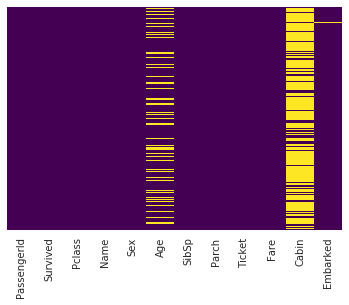

In [66]:
# check for the missing data using heatmap
sns.heatmap(pd.isnull(train),yticklabels=False,cbar=False,cmap='viridis')  # we can see that there are many missing values in cabin/age

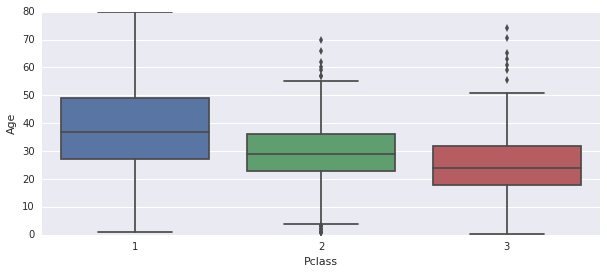

In [67]:
# find the relationship if we can get the refill the values
plt.figure(figsize=(10,4))
sns.boxplot(y='Age',x='Pclass',data=train)  # we can see that here Age is propostion to pclass, higher the class higher the age

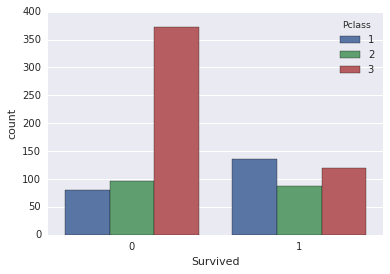

In [68]:
# Check the survived class 
sns.countplot(x='Survived',hue='Pclass',data=train)

([<matplotlib.axis.XTick at 0x7efe370e7310>,
 <a list of 2 Text xticklabel objects>)

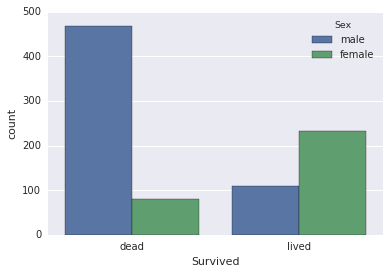

In [69]:
# Here you can find the survivour are major female 
sns.countplot(x='Survived',hue='Sex',data=train)
plt.xticks(range(2),('dead','lived'))


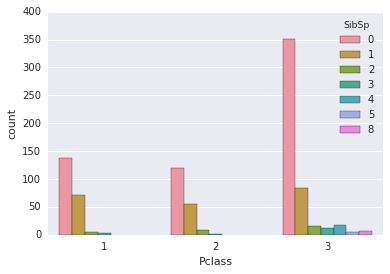

In [70]:
# we can find out the maximum ppl with siblings and spouse was travelling in 3rd class 
#where are 1st class have large number as alone or spouse
sns.countplot(x='Pclass',hue='SibSp',data=train,)

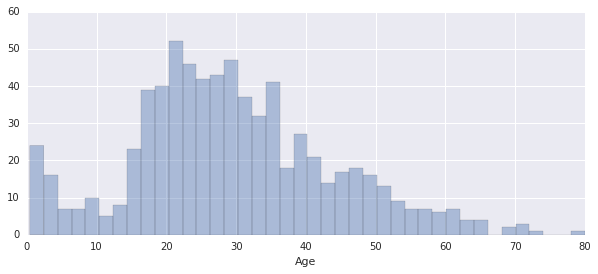

In [71]:
# Here we can find out that maximum people who are travelling are at young age between 18-35
plt.figure(figsize=(10,4))
sns.distplot(train['Age'].dropna(),hist=True,kde=False,bins=40)

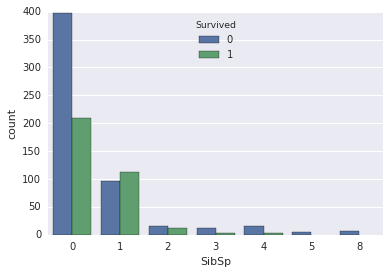

In [72]:
# lets find out how many people are travelling with how many siblings and spouse, we see that many ppl are travelling alone
sns.countplot(x='SibSp',hue='Survived',data=train)

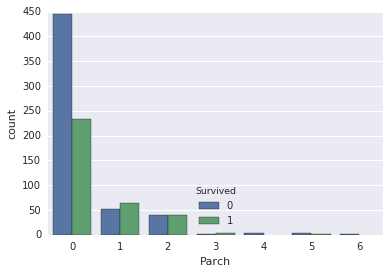

In [73]:
# Here you can find out how many ppl are travelling with parents and child and out of them how many survived
sns.countplot(x='Parch',hue='Survived',data=train)

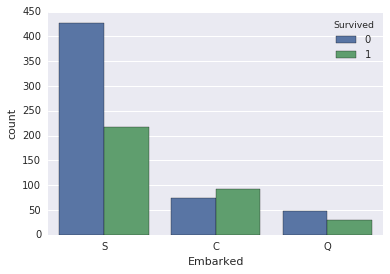

In [74]:
# Here you can find out, from where how many ppl came and out of them which are survived, people from c are lived more than dead
sns.countplot(x='Embarked',hue='Survived',data=train)

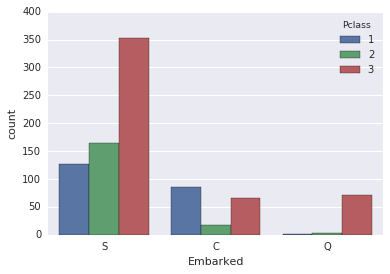

In [75]:
# now you can see the reason what people from c is most likely to be survived becoz mostly were in 1st class
sns.countplot(x='Embarked',hue='Pclass',data=train)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87]), <a list of 88 Text xticklabel objects>)

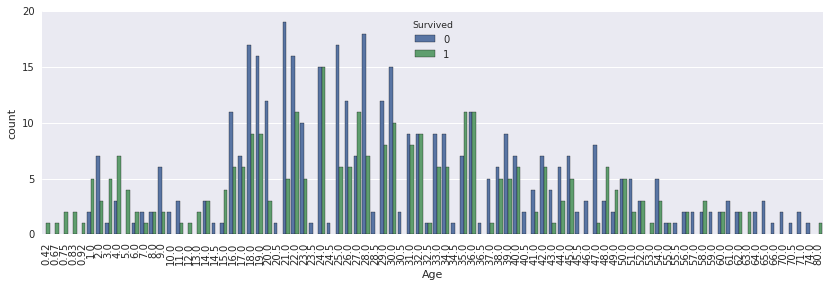

In [76]:
plt.figure(figsize=(14,4))
sns.countplot(x='Age',hue='Survived',data=train)
plt.xticks(rotation='90')

# Data Cleansing

In [105]:
# lets fill the average Age according to their class
def impute(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        if pclass == 2:
            return 29
        if pclass == 3:
            return 25
    else :
        return age
    
# replace the age column null values with average with respect to pclass
train['Age'] = train[['Age','Pclass']].apply(impute,axis=1).apply(np.int)


# remove the cabin column as its have lot of null values , so not of much use
train.drop('Cabin',inplace=True,axis=1)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr


In [102]:
# lets find out the title of name
def find_title(name):
    sirname,title = map(str,name.split(','))
    return title.strip().split('.')[0]

train['Title'] = train['Name'].apply(find_title)
train['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [109]:
# lets prepare dataset in total numerical format
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [113]:
train = pd.concat([train,sex,embark],axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,S,Mr,1.0,0.0,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C,Mrs,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,S,Miss,0.0,0.0,1.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,S,Mrs,0.0,0.0,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,S,Mr,1.0,0.0,1.0


In [117]:
# drop un necessory columns as not of much use
train_prepared = train.drop(['PassengerId','Name','Sex','Ticket','Title','Embarked'],axis=1)
train_prepared.head()  # now data is fully prepared for machine learning (all numerical fields)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22,1,0,7.2500,1.0,0.0,1.0
1,1,1,38,1,0,71.2833,0.0,0.0,0.0
2,1,3,26,0,0,7.9250,0.0,0.0,1.0
3,1,1,35,1,0,53.1000,0.0,0.0,1.0
4,0,3,35,0,0,8.0500,1.0,0.0,1.0


In [141]:
# Now we need to prepare the test dataset as we did for train
def impute_test(cols):
    age = cols[0]
    pclass = cols[1]
    if pd.isnull(age):
        if pclass == 1:
            return 43
        if pclass == 2:
            return 37
        if pclass == 3:
            return 24
    else :
        return age
    
test['Age'] = test[['Age','Pclass']].apply(impute_test,axis=1).apply(np.int)
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)
test = pd.concat([test,sex,embark],axis=1)
test_prepared = test.drop(['PassengerId','Name','Sex','Ticket','Embarked','Cabin'],axis=1)
test_prepared.head() 

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34,0,0,7.8292,1.0,1.0,0.0
1,3,47,1,0,7.0000,0.0,0.0,1.0
2,2,62,0,0,9.6875,1.0,1.0,0.0
3,3,27,0,0,8.6625,1.0,0.0,1.0
4,3,22,1,1,12.2875,0.0,0.0,1.0


# Machine leaning

In [143]:
X = train_prepared.drop('Survived',axis=1)
y = train_prepared['Survived']
X_train,X_test, y_train,y_test = train_test_split(X, y, test_size=0.40, random_state=101)

In [144]:
# importing th model
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [145]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# now predict the output on training dataset
predict = logmodel.predict(X_train)
print(classification_report(y_train,predict))

             precision    recall  f1-score   support

          0       0.84      0.89      0.86       342
          1       0.78      0.69      0.73       192

avg / total       0.82      0.82      0.82       534



In [146]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
print(confusion_matrix(y_train,predict))
print("Accuracy Score: %f" % accuracy_score(y_train,predict))
print("F1 Score: %f" % f1_score(y_train,predict))

[[305  37]
 [ 59 133]]
Accuracy Score: 0.820225
F1 Score: 0.734807


In [154]:
# let try to predict the servived on the basis of logistic model on test dataset
test['Survived'] = pd.Series(logmodel.predict(test_prepared.dropna(axis=0)))
test['Survived'] = test['Survived'].apply(lambda x: "No" if x < .5 else "Yes")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,male,Q,S,Survived
0,892,3,"Kelly, Mr. James",male,34,0,0,330911,7.8292,NaN,Q,1.0,1.0,0.0,No
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47,1,0,363272,7.0000,NaN,S,0.0,0.0,1.0,No
2,894,2,"Myles, Mr. Thomas Francis",male,62,0,0,240276,9.6875,NaN,Q,1.0,1.0,0.0,No
3,895,3,"Wirz, Mr. Albert",male,27,0,0,315154,8.6625,NaN,S,1.0,0.0,1.0,No
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22,1,1,3101298,12.2875,NaN,S,0.0,0.0,1.0,No


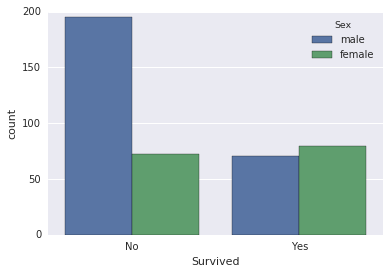

In [155]:
sns.countplot(x='Survived',hue='Sex',data=test)

# Done !!!